In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('C:/Users/Sujan/Documents/LHL/Mid term project/Data/rawdata_flights_test.csv')

In [3]:
from datetime import datetime
import calendar


In [4]:
df['fl_date'] = pd.to_datetime(df['fl_date'])
df['weekday'] = df['fl_date'].dt.weekday
df['day_of_month'] = df['fl_date'].dt.day
df['months'] = df['fl_date'].dt.month
df['year'] = df['fl_date'].dt.year
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,weekday,day_of_month,months,year
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,...,1810,1945,N,95,1,363,2,1,1,2020
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,...,1150,1320,N,90,1,363,2,1,1,2020
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,...,2020,2130,N,70,1,333,2,1,1,2020
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,...,1340,1455,N,75,1,333,2,1,1,2020
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,...,915,1035,N,80,1,333,2,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660551,2020-01-31,DL,DL_CODESHARE,DL,4954,9E,N926XJ,4954,11278,DCA,...,1859,2041,N,102,1,411,4,31,1,2020
660552,2020-01-31,DL,DL_CODESHARE,DL,4955,9E,N309PQ,4955,11278,DCA,...,1515,1702,N,107,1,411,4,31,1,2020
660553,2020-01-31,DL,DL_CODESHARE,DL,4956,9E,N324PQ,4956,12478,JFK,...,2205,2337,N,92,1,266,4,31,1,2020
660554,2020-01-31,DL,DL_CODESHARE,DL,4957,9E,N132EV,4957,13930,ORD,...,1035,1356,N,141,1,740,4,31,1,2020


In [5]:
delay_dict = {
    'AA' : 6.257647,
    'AS' : 1.012026,
    'BG' : 10.392093,
    'DL' : 2.786884,
    'F9' : 10.053030,
    'G4' : 8.131579,
    'HA' : 1.089486,
    'NK' : 4.337333,
    'UA' : 8.936649,
    'VX' : 3.584997,
    'WN' : 3.394395
    
}

df['MonthlyDelayCarrier'] = df['mkt_unique_carrier'].map(delay_dict)

In [6]:
df['MonthlyDelayCarrier'] = df['mkt_unique_carrier'].map(delay_dict)

In [7]:
new_df=df.reset_index()

In [8]:
new_df.columns

Index(['index', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'weekday', 'day_of_month', 'months', 'year', 'MonthlyDelayCarrier'],
      dtype='object')

In [9]:
new_df['delayReason'] = 0

In [10]:
new_df.rename({'mkt_unique_carrier': 'airline','months':'month','arr_delay_x':'arr_delay' }, axis=1, inplace=True)

In [11]:
new_df.dest

0         SFO
1         SFO
2         SJC
3         SJC
4         SJC
         ... 
660551    CVG
660552    CVG
660553    BTV
660554    JFK
660555    CLT
Name: dest, Length: 660556, dtype: object

In [12]:
df_model = new_df.drop(['branded_code_share','mkt_carrier','op_unique_carrier','tail_num','dup'],axis=1)

In [13]:
cat_df = df_model.select_dtypes(include=['object']).copy()

In [14]:
cat_df

,airline,origin,origin_city_name,dest,dest_city_name
0,WN,ONT,"Ontario, CA",SFO,"San Francisco, CA"
1,WN,ONT,"Ontario, CA",SFO,"San Francisco, CA"
2,WN,ONT,"Ontario, CA",SJC,"San Jose, CA"
3,WN,ONT,"Ontario, CA",SJC,"San Jose, CA"
4,WN,ONT,"Ontario, CA",SJC,"San Jose, CA"
...,...,...,...,...,...
660551,DL,DCA,"Washington, DC",CVG,"Cincinnati, OH"
660552,DL,DCA,"Washington, DC",CVG,"Cincinnati, OH"
660553,DL,JFK,"New York, NY",BTV,"Burlington, VT"
660554,DL,ORD,"Chicago, IL",JFK,"New York, NY"


In [15]:
cat_df = cat_df.drop(['origin_city_name','dest_city_name'],axis=1)

In [16]:
cat_df

,airline,origin,dest
0,WN,ONT,SFO
1,WN,ONT,SFO
2,WN,ONT,SJC
3,WN,ONT,SJC
4,WN,ONT,SJC
...,...,...,...
660551,DL,DCA,CVG
660552,DL,DCA,CVG
660553,DL,JFK,BTV
660554,DL,ORD,JFK


C:\Users\Sujan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


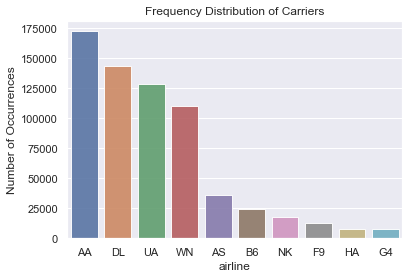

In [80]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = cat_df['airline'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('airline', fontsize=12)
plt.show()

In [61]:
cat_df_flights_lc = cat_df.copy()
cat_df_flights_lc['airline'] = cat_df_flights_lc['airline'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')   
cat_df_flights_lc['dest'] = cat_df_flights_lc['dest'].astype('category') 

In [18]:
# we can encode a caterorical variable by using cat.codes. but first we need to change its type from object to category as you can see above line.
cat_df_flights_lc['airline'] = cat_df_flights_lc['airline'].cat.codes
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].cat.codes
cat_df_flights_lc['dest'] = cat_df_flights_lc['dest'].cat.codes



In [17]:
cat_df_flights_lc

NameError: name 'cat_df_flights_lc' is not defined

In [63]:
# we use second method
df_model2 = df_model.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_model2['airline_code'] = lb_make.fit_transform(df_model['airline'])
df_model2['origin'] = lb_make.fit_transform(df_model['origin'])
df_model2['dest'] = lb_make.fit_transform(df_model['dest'])

df_model2.head() #Results in appending a new column to df

,index,fl_date,airline,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,...,crs_elapsed_time,flights,distance,weekday,day_of_month,month,year,MonthlyDelayCarrier,delayReason,airline_code
0,0,2020-01-01,WN,5888,5888,13891,246,"Ontario, CA",14771,313,...,95,1,363,2,1,1,2020,3.394395,0,9
1,1,2020-01-01,WN,6276,6276,13891,246,"Ontario, CA",14771,313,...,90,1,363,2,1,1,2020,3.394395,0,9
2,2,2020-01-01,WN,4598,4598,13891,246,"Ontario, CA",14831,320,...,70,1,333,2,1,1,2020,3.394395,0,9
3,3,2020-01-01,WN,4761,4761,13891,246,"Ontario, CA",14831,320,...,75,1,333,2,1,1,2020,3.394395,0,9
4,4,2020-01-01,WN,5162,5162,13891,246,"Ontario, CA",14831,320,...,80,1,333,2,1,1,2020,3.394395,0,9


In [136]:
df_model2.columns

Index(['index', 'fl_date', 'airline', 'mkt_carrier_fl_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'crs_elapsed_time', 'flights', 'distance', 'weekday',
       'day_of_month', 'month', 'year', 'MonthlyDelayCarrier', 'delayReason',
       'airline_code'],
      dtype='object')

In [113]:
model_df=df_model2.drop(['origin_city_name','dest_city_name'],axis=1)

In [83]:
model_df=df_model2.drop(['airline'],axis=1)

In [114]:
model_df

,index,fl_date,airline,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,crs_dep_time,...,crs_elapsed_time,flights,distance,weekday,day_of_month,month,year,MonthlyDelayCarrier,delayReason,airline_code
0,0,2020-01-01,WN,5888,5888,13891,246,14771,313,1810,...,95,1,363,2,1,1,2020,3.394395,0,9
1,1,2020-01-01,WN,6276,6276,13891,246,14771,313,1150,...,90,1,363,2,1,1,2020,3.394395,0,9
2,2,2020-01-01,WN,4598,4598,13891,246,14831,320,2020,...,70,1,333,2,1,1,2020,3.394395,0,9
3,3,2020-01-01,WN,4761,4761,13891,246,14831,320,1340,...,75,1,333,2,1,1,2020,3.394395,0,9
4,4,2020-01-01,WN,5162,5162,13891,246,14831,320,915,...,80,1,333,2,1,1,2020,3.394395,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660551,660551,2020-01-31,DL,4954,4954,11278,90,11193,83,1859,...,102,1,411,4,31,1,2020,2.786884,0,3
660552,660552,2020-01-31,DL,4955,4955,11278,90,11193,83,1515,...,107,1,411,4,31,1,2020,2.786884,0,3
660553,660553,2020-01-31,DL,4956,4956,12478,176,10785,53,2205,...,92,1,266,4,31,1,2020,2.786884,0,3
660554,660554,2020-01-31,DL,4957,4957,13930,247,12478,176,1035,...,141,1,740,4,31,1,2020,2.786884,0,3


In [115]:
model_df = model_df.drop(['index','op_carrier_fl_num','origin_airport_id','dest_airport_id'],axis=1)

In [116]:
model_df = model_df.rename(columns={"crs_elapsed_time": "air_time"})

In [117]:
model_df

,fl_date,airline,mkt_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,air_time,flights,distance,weekday,day_of_month,month,year,MonthlyDelayCarrier,delayReason,airline_code
0,2020-01-01,WN,5888,246,313,1810,1945,95,1,363,2,1,1,2020,3.394395,0,9
1,2020-01-01,WN,6276,246,313,1150,1320,90,1,363,2,1,1,2020,3.394395,0,9
2,2020-01-01,WN,4598,246,320,2020,2130,70,1,333,2,1,1,2020,3.394395,0,9
3,2020-01-01,WN,4761,246,320,1340,1455,75,1,333,2,1,1,2020,3.394395,0,9
4,2020-01-01,WN,5162,246,320,915,1035,80,1,333,2,1,1,2020,3.394395,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660551,2020-01-31,DL,4954,90,83,1859,2041,102,1,411,4,31,1,2020,2.786884,0,3
660552,2020-01-31,DL,4955,90,83,1515,1702,107,1,411,4,31,1,2020,2.786884,0,3
660553,2020-01-31,DL,4956,176,53,2205,2337,92,1,266,4,31,1,2020,2.786884,0,3
660554,2020-01-31,DL,4957,247,176,1035,1356,141,1,740,4,31,1,2020,2.786884,0,3


In [118]:
model_df = model_df.drop(['flights'],axis=1)

In [119]:
model_df

,fl_date,airline,mkt_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,air_time,distance,weekday,day_of_month,month,year,MonthlyDelayCarrier,delayReason,airline_code
0,2020-01-01,WN,5888,246,313,1810,1945,95,363,2,1,1,2020,3.394395,0,9
1,2020-01-01,WN,6276,246,313,1150,1320,90,363,2,1,1,2020,3.394395,0,9
2,2020-01-01,WN,4598,246,320,2020,2130,70,333,2,1,1,2020,3.394395,0,9
3,2020-01-01,WN,4761,246,320,1340,1455,75,333,2,1,1,2020,3.394395,0,9
4,2020-01-01,WN,5162,246,320,915,1035,80,333,2,1,1,2020,3.394395,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660551,2020-01-31,DL,4954,90,83,1859,2041,102,411,4,31,1,2020,2.786884,0,3
660552,2020-01-31,DL,4955,90,83,1515,1702,107,411,4,31,1,2020,2.786884,0,3
660553,2020-01-31,DL,4956,176,53,2205,2337,92,266,4,31,1,2020,2.786884,0,3
660554,2020-01-31,DL,4957,247,176,1035,1356,141,740,4,31,1,2020,2.786884,0,3


In [90]:
model_df = model_df[model_df.day_of_month<=7]

In [91]:
model_df.origin.value_counts()

247    7211
20     6975
92     5719
91     5402
71     4942
       ... 
332       2
271       2
8         2
252       2
32        2
Name: origin, Length: 363, dtype: int64

In [42]:
model_df.to_csv('test_data_draft_by_sujan.csv', index = False, header=True)

In [92]:
model_df = model_df.drop(columns='delayReason', axis=1)

In [93]:
model_df = model_df.drop(columns=['origin_city_name','dest_city_name'], axis=1)

In [94]:
model_df

,fl_date,mkt_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,air_time,distance,weekday,day_of_month,month,year,MonthlyDelayCarrier,airline_code
0,2020-01-01,5888,246,313,1810,1945,95,363,2,1,1,2020,3.394395,9
1,2020-01-01,6276,246,313,1150,1320,90,363,2,1,1,2020,3.394395,9
2,2020-01-01,4598,246,320,2020,2130,70,333,2,1,1,2020,3.394395,9
3,2020-01-01,4761,246,320,1340,1455,75,333,2,1,1,2020,3.394395,9
4,2020-01-01,5162,246,320,915,1035,80,333,2,1,1,2020,3.394395,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150618,2020-01-07,4813,99,176,1755,1952,117,509,1,7,1,2020,2.786884,3
150619,2020-01-07,4814,141,196,600,759,119,610,1,7,1,2020,2.786884,3
150620,2020-01-07,4815,20,360,1715,1816,121,589,1,7,1,2020,2.786884,3
150621,2020-01-07,4815,360,20,1851,2145,114,589,1,7,1,2020,2.786884,3


In [39]:
model_df.columns

Index(['fl_date', 'mkt_carrier_fl_num', 'origin', 'dest', 'crs_dep_time',
       'crs_arr_time', 'air_time', 'distance', 'weekday', 'day_of_month',
       'month', 'year', 'MonthlyDelayCarrier', 'airline_code'],
      dtype='object')